# Process-Bigraphs 
The `process-bigraph` library is an extension of the `bigraph-schema` library, offering a computational framework that integrates processes into bigraphs.

In [4]:
# !pip install bigraph-viz
# !pip install bigraph-schema
# !pip install process-bigraph
!pip freeze | grep bigraph

bigraph-schema==0.0.19
bigraph-viz==0.0.30


In [5]:
#some imports and set up
from bigraph_viz import plot_bigraph, pf
from bigraph_viz.dict_utils import replace_regex_recursive

plot_settings = {'remove_process_place_edges': True}
save_images = False
if save_images:
    plot_settings.update({'out_dir': 'out','dpi': '250'})

### Bigraphs Introduction

Process Bigraphs are based on a mathematical formalism [introduced by Robin Milner in 2009](https://www.google.com/search?q=the+space+and+motion+of+communicating+agents+by+robin+milner), which was expanded in [Vivarium](https://doi.org/10.1093/bioinformatics/btac049) with the addition of Processes, and standardized with the introduction of the Schema format. Bigraphs provide a powerful framework for compositional modeling due to their ability to represent complex systems through hierarchical structures and flexible reconfigurations, thus enabling the seamless composition and decomposition of system components.

The bigraph combines two distinct graph structures: the place graph and the link graph.

**Place graph** (on the left): The place graph represents the spatial aspect of a system, capturing the hierarchical containment of entities within other entities. In the place graph, nodes represent entities, and edges represent the containment relationships between them -- these are shown as solid connections with outers above and inners below.

**Link graph** (on the right): The link graph represents the connectivity aspect of a system, capturing how entities link or interact with each other. In the link graph, nodes represent entities, while hyperedges capture the relationships between these entities. Unlike traditional graph edges, which connect two nodes, hyperedges can connect any number of nodes.

In [6]:
placegraph_spec = {
    'v0': {
        'v1': 'Any',
        'v2': {
            'v3': 'Any'
        }
    }, 
    'v4': {
        'v5': 'Any'
    }
}
placegraph = plot_bigraph(placegraph_spec, **plot_settings, filename='placegraph')

linkgraph_spec = {
    'e0': {
        'wires': {
            'e0.0': 'v0',
            'e0.1': 'v1',
            'e0.2': 'v4'}},
    'e1': {
        'wires': {
            'e0.0': 'v3',
            'e0.1': 'v1'}},
    'e2': {
        'wires': {
            'e0.0': 'v3',
            'e0.1': 'v4',
            'e0.2': 'v5'
        }
    },
    'v0': 'Any', 'v1': 'Any', 'v2': 'Any', 'v3': 'Any', 'v4': 'Any', 'v5': 'Any',
}
node_groups = [
    [('v1',), ('e0',), ('v4',)],
    [('e1',), ('v5',)],[('v3',), ('e2',)]]
linkgraph = plot_bigraph(
    linkgraph_spec, **plot_settings, rankdir='LR', collapse_processes=True, port_labels=False, node_groups=node_groups, filename='linkgraph')

process_graph = plot_bigraph(
    linkgraph_spec, **plot_settings, port_labels=False, filename='process_graph')

In [7]:
from IPython.display import display, HTML

# Render both graphs to SVG
svg1 = placegraph.pipe(format='svg').decode('utf-8')
svg2 = linkgraph.pipe(format='svg').decode('utf-8')

# Combine SVGs side by side using an HTML table and display
html_code = f"""
<table>
    <tr>
        <td>{svg1}</td>
        <td>{svg2}</td>
    </tr>
</table>
"""
display(HTML(html_code))

"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 8.1.0 (20230707.0739) --> <!-- Title: bigraph Pages: 1 --> bigraph <!-- ('v0',) --> ('v0',) v0 <!-- ('v0', 'v1') --> ('v0', 'v1') v1 <!-- ('v0',)->('v0', 'v1') --> ('v0',)->('v0', 'v1') <!-- ('v0', 'v2') --> ('v0', 'v2') v2 <!-- ('v0',)->('v0', 'v2') --> ('v0',)->('v0', 'v2') <!-- ('v0', 'v2', 'v3') --> ('v0', 'v2', 'v3') v3 <!-- ('v0', 'v2')->('v0', 'v2', 'v3') --> ('v0', 'v2')->('v0', 'v2', 'v3') <!-- ('v4',) --> ('v4',) v4 <!-- ('v4', 'v5') --> ('v4', 'v5') v5 <!-- ('v4',)->('v4', 'v5') --> ('v4',)->('v4', 'v5')"


**Bigraph.** The bigraph is formed by combining the place graph and the hypergraph in a way that maintains their respective structures while relating them through a shared set of nodes. In a bigraph, nodes are shared between the place graph and the hypergraph, thus capturing both spatial containment and connectivity relationships between entities.

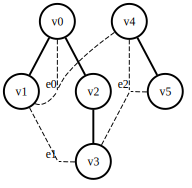

In [8]:
bigraph = {
    'v0': {
        'v1': 'Any',
        'v2': {
            'v3': 'Any'}},
    'v4': {
        'v5': 'Any'},
    'e0': {
        '_type': 'edge',
        'wires': {
            'e0.0': 'v0',
            'e0.1': ('v0', 'v1'),
            'e0.2': 'v4'}},
    'e1': {
        '_type': 'edge',
        'wires': {
            'e0.0': ('v0', 'v2', 'v3'),
            'e0.1': ('v0', 'v1')}},
    'e2': {
        '_type': 'edge',
        'wires': {
            'e0.0': ('v0', 'v2', 'v3'),
            'e0.1': 'v4',
            'e0.2': ('v4', 'v5')}}}

node_groups2 = [ #manually line up nodes in plotting tool to improve final image
    [('v0', 'v1',), ('e0',), ('v0', 'v2',), ('e2',), ('v4', 'v5',)], 
    [('e1',), ('v0', 'v2', 'v3'),]]
plot_bigraph(
    bigraph, **plot_settings, node_groups=node_groups2, port_labels=False, collapse_processes=True, filename='bigraph')

**Process Bigraph.** Process Bigraph Schema reimagines the bigraph with what we will call a *Process Bigraph*. Variables are contained in Stores (circles), which can be embedded in the place graph hierarchy, represented by the dark edges. Instead of hyperedges, this framework employs Processes (the rectangles) which have ports (solid black dots) connect via wires (dashed edges) to  variables within the Stores. Processes are functions that read and write to variables through their ports. They can be used to rewrite the bigraph by adding new structure and new processes.

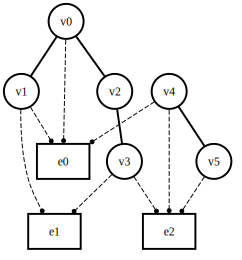

In [9]:
plot_bigraph(bigraph, **plot_settings, port_labels=False, filename='process_bigraph')

See more examples of process bigraphs:
 - [Process Bigraph Basics](https://vivarium-collective.github.io/bigraph-viz/notebooks/basics.html)
 - [E. coli Whole Cell Model Wiring Diagram](https://github.com/vivarium-collective/bigraph-viz/blob/main/doc/_static/ecoli.png?raw=true)
 - [Tumor/T cell multiscale simulation](https://nbviewer.org/github/vivarium-collective/tumor-tcell/blob/master/jupyter_notebooks/diagrams.ipynb)